# COMP2200 Assignment 2

## Project Title
"Predicting Mental Health Outcomes in the Tech Workforce Using Work Environment and Lifestyle Data"

## 1. Overview & Justification
### 1.1 Project Objective
This project aims to analyse and predict mental health treatment-seeking behavior among employees in the tech industry using the 2014 Mental Health in Tech Survey dataset. Specifically, I aim to develop predictive models to determine whether an individual is likely to have sought treatment for a mental health condition, based on demographic information, work conditions, and employer policies around mental health.

This project is rooted in the broader goal of understanding what workplace and personal factors influence the likelihood of treatment-seeking among tech workers. My analysis will involve both identifying key influencing features and building classification models to assess the predictive value of these features.

### 1.2 Research Questions
**1. Prediction Question:**
* Can whether a tech worker has sought mental health treatment be predicted based on their work environment, employer support, and personal factors?

**2. Exploratory Question:**
* Which workplace policies (e.g remote work, anonymity, mental health benefits) are most strongly associated with treatment-seeking behaviour?

**3. Model Comparison Question:**
* How do the predictive capabilities of a baseline model (Logistic Regression) compare with more advanced models (Decision Tree, Neural Network) when predicting whether individuals in the tech industry seek treatment for mental health?

### 1.3 Dataset Context
The dataset originates from a 2014 survey conducted to measure the frequency of mental health disorders and attitudes toward mental health in the tech workplace. It consists of 1,259 anonymised responses from tech industry employees.

The dataset covers a wide range of features, such as:

- **Demographics:** age, gender, country, and state.
- **Employment details:** self-employment status, company size, remote work status. 
- **Mental health policies:** mental health benefits, access to care options, wellness programs, anonymity, ease of taking medical leave.
- **Attitudinal data:** willingness to discuss mental health with coworkers/supervisors, perceived consequences of disclosure.
- **Personal experience:** family history of mental illness, interference of mental health with work, and whether they’ve sought treatment.

Source: [Mental Health in Tech Survey](https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey/data)


### 1.4 Why This Problem Is Meaningful and Worth Studying
Mental health has become a pressing concern in the tech industry. The field is often characterised by high-pressure environments, job insecurity, and workplace isolation. Despite increased awareness, stigma and fear of career repercussions continue to prevent many professionals from seeking support. This project aims to provide data-driven recommendations to promote supportive mental health environments in tech workplaces by analysing which factors most influence treatment-seeking and how employer policies impact these decisions. This research holds significant social and practical relevance for employee well-being and organisational health.

## 2. Data Preparation, Cleanup, and Exploration
### 2.1 Dataset Source
Source: [Mental Health in Tech Survey](https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey/data)

### 2.2 Variable Identification
The dataset includes both categorical and numerical features. Key variables identified for the analysis include:

#### Target Variable:
- **treatment** (whether the respondent has sought mental health treatment)

#### Predictor Variables:

- **Demographic:** age, gender, country, self-employed, family_history
- **Work Environment:** no_employees, remote_work, tech_company
- **Employer Support:** benefits, care_options, wellness_program, seek_help, anonymity, leave, mental_health_consequence, phys_health_consequence
- **Attitudes & Behavior:** coworkers, supervisor, mental_health_interview, phys_health_interview, mental_vs_physical, obs_consequ

### 2.3 Imports

In [193]:
# Data manipulation & visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning (preprocessing)
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Machine learning (models)
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

# Machine learning (evaluation)
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay

### 2.4 Load Dataset & Initial Inspection
This cell loads the survey dataset and performs an initial inspection. I check the dataset size, preview the first few rows, and review data types and missing values. Summary statistics show data distributions and highlight issues such as missing entries and invalid age values. These will be addressed in the data cleaning steps.

In [196]:
# Load dataset
df = pd.read_csv("survey.csv")

# Initial inspection
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())

print("\nData types and missing values:")
display(df.info())

print("\nSummary statistics:")
display(df.describe(include='all'))

Dataset shape: (1259, 27)

First 5 rows:


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN



Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259

None


Summary statistics:


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1259,1.259000e+03,1259,1259,744,1241,1259,1259,995,1259,...,1259,1259,1259,1259,1259,1259,1259,1259,1259,164
unique,1246,NaN,49,48,45,2,2,2,4,6,...,5,3,3,3,3,3,3,3,2,160
top,2014-08-27 12:44:51,NaN,Male,United States,CA,No,No,Yes,Sometimes,6-25,...,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,2,NaN,615,751,138,1095,767,637,465,290,...,563,490,925,774,516,1008,557,576,1075,5
mean,NaN,7.942815e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.818299e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,3.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.5 Missing Value Treatment
This cell handles missing values in the dataset. It first identifies columns with missing data, then removes irrelevant and sparsely populated columns (‘Timestamp’, ‘state’, and ‘comments’). Missing values in ‘self_employed’ are filled with the mode, and ‘work_interfere’ missing entries are replaced with ‘Not applicable’. After this, there are no remaining missing values. I then save the cleaned data set for further analysis. 

In [199]:
# Check missing values
print("Missing values per column (before cleaning):")
display(df.isnull().sum().sort_values(ascending=False))

# Drop irrelevant/highly missing columns
df_clean = df.drop(['Timestamp', 'state', 'comments'], axis=1).copy()

# Impute 'self_employed' w mode
df_clean['self_employed'] = df_clean['self_employed'].fillna(df_clean['self_employed'].mode()[0])

# Impute 'work_interfere' w 'Not applicable'
df_clean['work_interfere'] = df_clean['work_interfere'].fillna('Not applicable')

print("\nMissing values after cleaning:")
display(df_clean.isnull().sum().sort_values(ascending=False))

print(f"\nTotal missing values after cleaning: {df_clean.isnull().sum().sum()}")
print(f"Dataset shape after cleaning: {df_clean.shape}")

df = df_clean.copy()

Missing values per column (before cleaning):


comments                     1095
state                         515
work_interfere                264
self_employed                  18
seek_help                       0
obs_consequence                 0
mental_vs_physical              0
phys_health_interview           0
mental_health_interview         0
supervisor                      0
coworkers                       0
phys_health_consequence         0
mental_health_consequence       0
leave                           0
anonymity                       0
Timestamp                       0
wellness_program                0
Age                             0
benefits                        0
tech_company                    0
remote_work                     0
no_employees                    0
treatment                       0
family_history                  0
Country                         0
Gender                          0
care_options                    0
dtype: int64


Missing values after cleaning:


Age                          0
Gender                       0
mental_vs_physical           0
phys_health_interview        0
mental_health_interview      0
supervisor                   0
coworkers                    0
phys_health_consequence      0
mental_health_consequence    0
leave                        0
anonymity                    0
seek_help                    0
wellness_program             0
care_options                 0
benefits                     0
tech_company                 0
remote_work                  0
no_employees                 0
work_interfere               0
treatment                    0
family_history               0
self_employed                0
Country                      0
obs_consequence              0
dtype: int64


Total missing values after cleaning: 0
Dataset shape after cleaning: (1259, 24)


### 2.6 Data Cleaning (Age and Gender)
This cell filters the dataset to keep only valid ages between 18 and 100. I also standardised gender entries by mapping common female and male variants to “Female” and “Male,” all other responses were labelled as “Other.” This ensures consistent and meaningful gender categories for analysis.

In [202]:
# Remove invalid ages (retain 18–100)
df = df[(df['Age'] >= 18) & (df['Age'] <= 100)]

# Standardise gender labels
def clean_gender(g):
    g = str(g).strip().lower()
    female_terms = ['female', 'f', 'woman', 'female ', 'cis female', 'femme']
    male_terms = ['male', 'm', 'man', 'male ', 'cis male']
    
    if any(term in g for term in female_terms):
        return "Female"
    elif any(term in g for term in male_terms):
        return "Male"
    else:
        return "Other"

df["Gender"] = df["Gender"].apply(clean_gender)

# Check distribution of gender
print("Gender value counts after cleaning:")
print(df["Gender"].value_counts())
print("\nNumber of entries labelled 'Other':", (df["Gender"] == "Other").sum())

# Check distribution of age
print("\nAge distribution statistics:")
print(df["Age"].describe())

Gender value counts after cleaning:
Gender
Male      989
Female    252
Other      10
Name: count, dtype: int64

Number of entries labelled 'Other': 10

Age distribution statistics:
count    1251.000000
mean       32.076739
std         7.288272
min        18.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64


### 2.7 Univariate Analysis
I visualised the distribution of the target variable treatment using a count plot and printed its relative frequencies. I also examined the age distribution with a histogram including a KDE curve, and displayed the frequency of gender categories with a bar chart. This helps understand the basic makeup and balance of key variables.

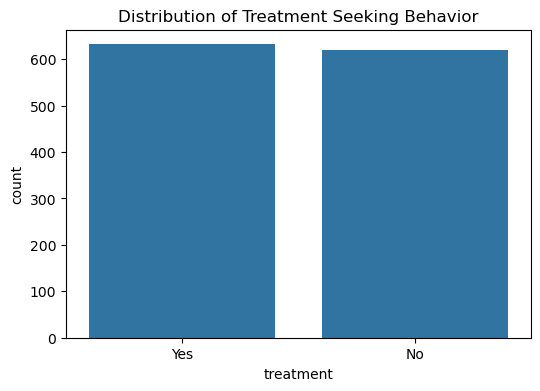


Treatment seeking rates:


treatment
Yes    0.505196
No     0.494804
Name: proportion, dtype: float64

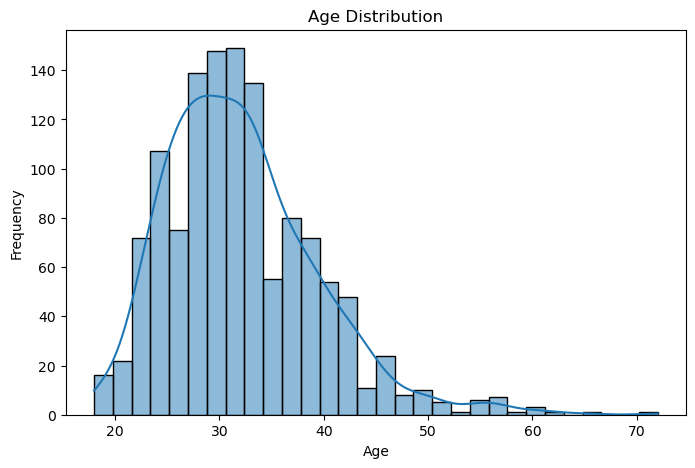

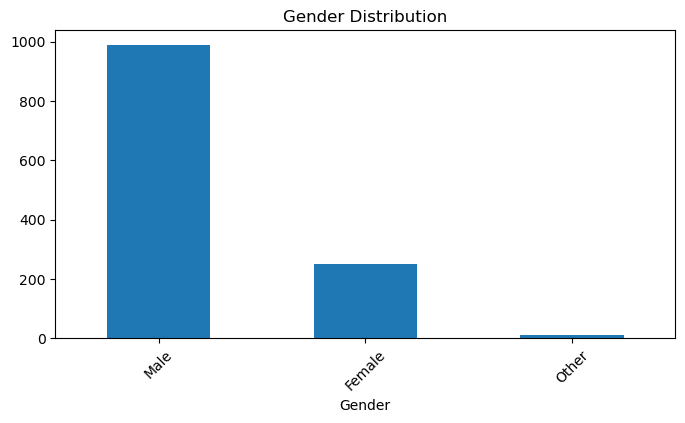

In [205]:
# Target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='treatment', data=df)
plt.title('Distribution of Treatment Seeking Behavior')
plt.show()

print("\nTreatment seeking rates:")
display(df['treatment'].value_counts(normalize=True))

# Age distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Gender distribution
plt.figure(figsize=(8, 4))
df['Gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xticks(rotation=45)
plt.show()

**Interpretation:**
about 50% of participants sought mental health treatment, indicating a substantial portion affected or aware of mental health needs. Age distribution peaks in young to middle adulthood, typical for tech industry demographics. Gender counts show a majority of male participants.

### 2.8 Bivariate Analysis
I explored relationships between the target variable treatment and key categorical features (Gender, family_history, and remote_work) using count plots with treatment status as hue. This reveals how treatment-seeking behavior varies across these groups.

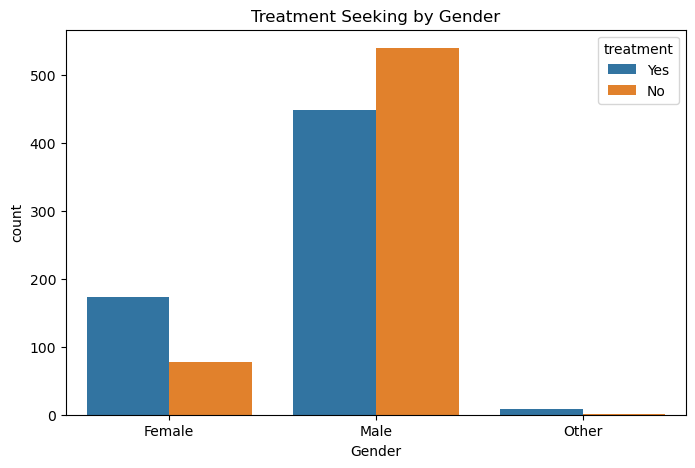

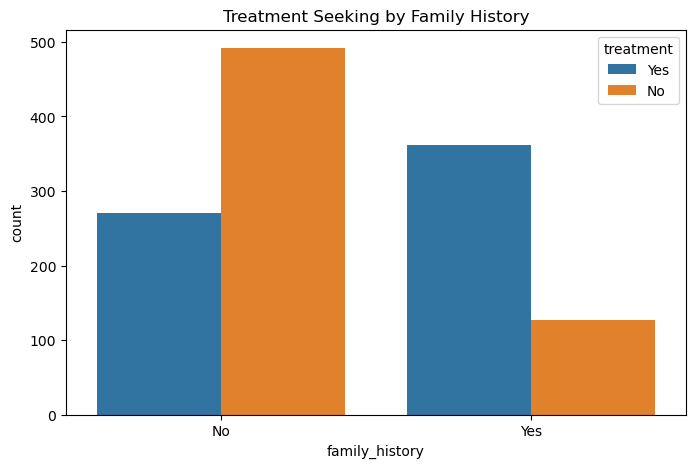

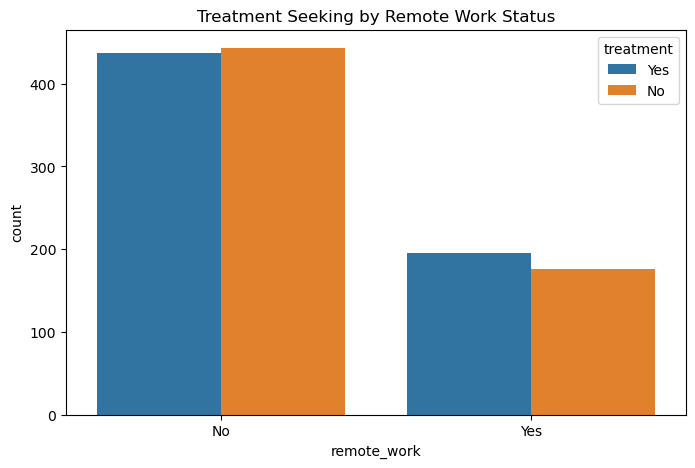

In [209]:
# Treatment by gender
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Gender", hue="treatment")
plt.title("Treatment Seeking by Gender")
plt.show()

# Treatment by family history
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="family_history", hue="treatment")
plt.title("Treatment Seeking by Family History")
plt.show()

# Treatment by remote work
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="remote_work", hue="treatment")
plt.title("Treatment Seeking by Remote Work Status")
plt.show()

**Interpretation:**
treatment seeking varies by gender, males are the majority but all groups show treatment seekers. Those with a family history of mental illness are more likely to seek treatment, showing familial influence on behavior. Remote work status shows less clear distinction, this suggests other factors may play stronger roles.

## 3 Prediction Modelling and Model Comparison
### 3.1 Objective
This section aims to predict whether a tech industry employee has sought mental health treatment based on demographic, workplace, and employer support factors.
It also evaluates the effectiveness of the different models in making this prediction.

Specifically, I will compare the performance of:
- **Baseline Model:** Logistic Regression
- **Model 1:** Decision Tree Classifier
- **Model 2:** Neural Network (MLPClassifier)

### 3.2 Data Preparation for Modelling
The dataset is split into features (X) and target (y). Categorical features are one-hot encoded, and the target variable is label encoded into binary values. The data is then split into training and testing sets with stratification. Finally, features are standardised using StandardScaler to improve model performance for algorithms sensitive to feature scaling.

**Note:** Scaled features are used for Logistic Regression and Neural Network models, but not for the Decision Tree, as tree-based models are unaffected by feature scaling.

In [213]:
# Define target & features
X = df.drop('treatment', axis=1).copy()
y = df['treatment']

# Encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Encode target variable to binary labels
y_encoded = LabelEncoder().fit_transform(y)

# Split dataset into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# Scale features for models that require it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 3.3 Baseline Model: Logistic Regression
Logistic Regression is used as the baseline classifier for its simplicity and interpretability. The model is trained on the scaled training data, then evaluated on the test set. Performance metrics including accuracy, precision, recall, F1-score, and AUC indicate solid predictive ability, with an accuracy of 0.814 and AUC of 0.863.

In [216]:
# Train
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

# Predict
y_pred_logreg = logreg.predict(X_test_scaled)

# Evaluation metrics
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))
print(f"Logistic Regression Accuracy: {logreg.score(X_test_scaled, y_test):.3f}")
print(f"Logistic Regression AUC: {roc_auc_score(y_test, logreg.predict_proba(X_test_scaled)[:, 1]):.3f}")

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.74      0.80       186
           1       0.78      0.89      0.83       190

    accuracy                           0.81       376
   macro avg       0.82      0.81      0.81       376
weighted avg       0.82      0.81      0.81       376

Logistic Regression Accuracy: 0.814
Logistic Regression AUC: 0.863


### 3.4 Decision Tree Classifier
A Decision Tree classifier with a maximum depth of 5 was trained on the dataset. It achieved an accuracy of 0.790 and an AUC of 0.850. The model was evaluated using precision, recall, and F1-score metrics on the test set.

In [219]:
# Train
tree = DecisionTreeClassifier(random_state=42, max_depth=5)
tree.fit(X_train, y_train)

# Predict
y_pred_tree = tree.predict(X_test)

# Evaluation metrics
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))
print(f"Decision Tree Accuracy: {tree.score(X_test, y_test):.3f}")
print(f"Decision Tree AUC: {roc_auc_score(y_test, tree.predict_proba(X_test)[:, 1]):.3f}")

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.62      0.75       186
           1       0.72      0.95      0.82       190

    accuracy                           0.79       376
   macro avg       0.82      0.79      0.78       376
weighted avg       0.82      0.79      0.78       376

Decision Tree Accuracy: 0.790
Decision Tree AUC: 0.850


#### 3.4.1 Hyperparameter Tuning: Decision Tree
To improve model performance, I performed hyperparameter tuning on the Decision Tree using GridSearchCV.  
The goal was to find the best configuration for `max_depth` and `min_samples_split`.

In [222]:
# Define
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV for Decision Tree
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='roc_auc'
)

grid_search.fit(X_train, y_train)

# Best parameters & corresponding performance
print("Best Parameters:", grid_search.best_params_)
print(f"Best Cross-Validated AUC: {grid_search.best_score_:.3f}")

Best Parameters: {'max_depth': 5, 'min_samples_split': 5}
Best Cross-Validated AUC: 0.850


To explore the impact of hyperparameters on model performance, I performed a grid search with cross-validation over two key parameters:
- `max_depth`: controls the maximum depth of the tree.
- `min_samples_split`: defines the minimum number of samples required to split an internal node.

The optimal parameters were found to be:
- `max_depth = 5`
- `min_samples_split = 5`

This configuration achieved a ross-validated AUC of 0.850, which matches the AUC of the default model.  
While the performance did not improve, this analysis demonstrates that the untuned model was already operating near optimal capacity within the selected parameter range.  
This shows the importance of hyperparameter analysis not only for optimisation, but also for confirming model ability.

### 3.5 Neural Network Classifier (MLP)
A Neural Network (MLPClassifier) with one hidden layer of 50 neurons was trained using scaled input features. The model achieved an accuracy of 0.758 and an AUC of 0.825 on the test set, with evaluation based on classification metrics such as precision, recall, and F1-score.

The choice of a single hidden layer with 50 neurons was made to balance the model complexity and the training stability considering the size of the dataset.

In [226]:
# Train
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Predict
y_pred_mlp = mlp.predict(X_test_scaled)

# Evaluation metrics
print("MLP Classification Report:")
print(classification_report(y_test, y_pred_mlp))
print(f"MLP Accuracy: {mlp.score(X_test_scaled, y_test):.3f}")
print(f"MLP AUC: {roc_auc_score(y_test, mlp.predict_proba(X_test_scaled)[:, 1]):.3f}")

MLP Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.70      0.74       186
           1       0.73      0.82      0.77       190

    accuracy                           0.76       376
   macro avg       0.76      0.76      0.76       376
weighted avg       0.76      0.76      0.76       376

MLP Accuracy: 0.758
MLP AUC: 0.825


## 4 Model Comparision and Discussion
### 4.1 Rationale for Model Selection
The goal was to predict if a tech industry employee has sought mental health treatment based on work environment, employer support, and personal factors. The chosen models offer complementary strengths to address this classification task:

- **Logisic Regression** was used as a basline because of its simplicity, interpretability, and efficiency on binary classification problems.
- **Decision Tree Classifier** was selected for its ability to model non-linear interactions and generate human-interpretable rules.
- **Neural Network (MLPClassifier)** was selected to explore the potential of a more complex, non-linear model that can capture subtle feature interactions.

These models balance interpretability, complexity, and predictive power providing a thorough assessment.

### 4.2 Model Performance Comparison
| Model               | Accuracy |  AUC  | Advantages                                                                                 | Disadvantages                                                                                 |
|---------------------|----------|-------|--------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------|
| Logistic Regression | 0.814    | 0.863 | Simple, fast, interpretable, good baseline performance, provides feature importance via coefficients | Assumes linear relationships, limited with complex data                                       |
| Decision Tree       | 0.790    | 0.850 | Captures non-linearities, interpretable, identifies key features, no need for feature scaling       | Prone to overfitting (mitigated by tuning max_depth/min_samples_split), less stable with small changes |
| Neural Network (MLP)| 0.758    | 0.825 | Captures complex patterns, flexible                                                       | Requires careful tuning (layers, learning rate), less interpretable, computationally expensive         |


- **Logistic Regression** showed the best overall performance. It had the highest AUC (0.863), making it a reliable and interpretable model for real-world application.
- **Decision Tree** was slightly less accurate but valuable for explaining the decision-making process, identifying key drivers of treatment-seeking through feature importance.
- **Neural Network (MLP)** underperformed relative to simpler models. This may be due to the dataset's size and structure, which limited the neural network’s ability to leverage its full potential.


### 4.3 Cross-Validation Results
The cross-validation results also confirm that Logistic Regression performs best. It has a higher average AUC compared to the Decision Tree and Neural Network. The standard deviations are small. This suggests model performance is stable across different data splits.

In [229]:
# Cross-validation for Logistic Regression
cv_scores_logreg = cross_val_score(logreg, X_train_scaled, y_train, cv=5, scoring='roc_auc')
print(f"Logistic Regression CV AUC: {cv_scores_logreg.mean():.3f} ± {cv_scores_logreg.std():.3f}")

# Cross-validation for Decision Tree
cv_scores_tree = cross_val_score(tree, X_train, y_train, cv=5, scoring='roc_auc')
print(f"Decision Tree CV AUC: {cv_scores_tree.mean():.3f} ± {cv_scores_tree.std():.3f}")

# Cross-validation for MLP
cv_scores_mlp = cross_val_score(mlp, X_train_scaled, y_train, cv=5, scoring='roc_auc')
print(f"Neural Network CV AUC: {cv_scores_mlp.mean():.3f} ± {cv_scores_mlp.std():.3f}")

Logistic Regression CV AUC: 0.883 ± 0.022
Decision Tree CV AUC: 0.844 ± 0.024
Neural Network CV AUC: 0.835 ± 0.030


### 4.4 Error Analysis (Logistic Regression)
To further understand the Logistic Regression model's strengths and limitations, I conducted error analysis by examining the confusion matrix and focusing on the types of errors made.

- **True Positives:** 169
- **True Negatives:** 137 
- **False Positives:** 49 
- **False Negatives:** 21

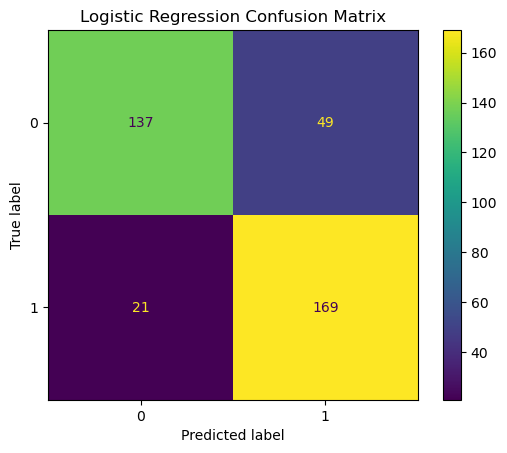

In [232]:
ConfusionMatrixDisplay.from_estimator(logreg, X_test_scaled, y_test)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

**Interpretation:**
- The model has a relatively high number of false positives (49). This means that it tends to over-predict treatment-seeking behavior. Although this would lead to some unnecessary follow-up, in the context of mental health, this type of error would be more acceptable than missing someone in need.

- False negatives (21) are comparatively low. This is encouraging. It means the model performs well in identifying those who actually sought treatment, which is critical in mental health support.


## 5 Visualisation and Insights
### 5.1 ROC Curve Comparison
I plotted ROC curves to visually compare the models. These curves show the trade-off between sensitivity (True Positive Rate) and specificity (False Positive Rate) across classification thresholds.

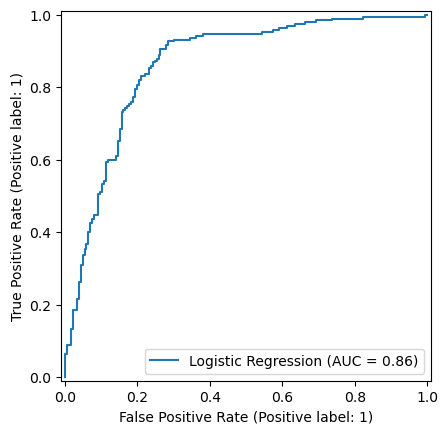

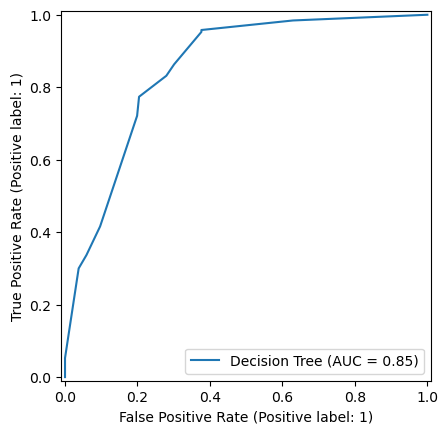

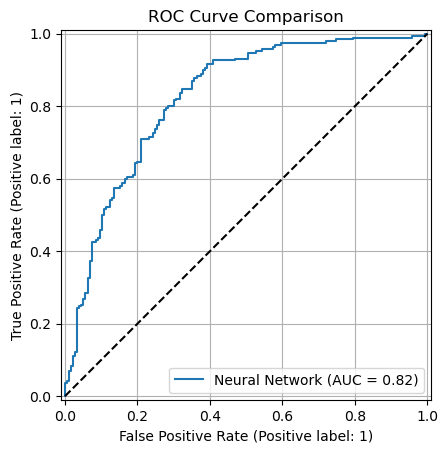

In [236]:
# ROC curves for all models
RocCurveDisplay.from_estimator(logreg, X_test_scaled, y_test, name='Logistic Regression')
RocCurveDisplay.from_estimator(tree, X_test, y_test, name='Decision Tree')
RocCurveDisplay.from_estimator(mlp, X_test_scaled, y_test, name='Neural Network')

# Plottinggg
plt.title('ROC Curve Comparison')
plt.plot([0, 1], [0, 1], 'k--')
plt.legend()
plt.grid()
plt.show()

**Discussion**
- Logistic Regression shows the highest AUC (0.86), indicating strong overall performance in distinguishing employees who sought treatment and those who didn’t.
- Decision Tree performs very slightly worse but still above baseline.
- Neural Network underperforms in this context, this is likely due to the dataset size and overfitting.

These curves validate the quantitative metrics discussed earlier and confirm that Logistic Regression generalises best. This supports its selection as the most reliable model.

### 5.2 Key Predictive Features (Logistic Regression)
I applied feature importance to the Logistic Regression model to understand which features most influence the prediction. I chose this model as it proved to be both the best-performing and the most interpretable model in this study. 

Positive coefficients indicate features that increase the likelihood of seeking treatment, while negative coefficients indicate a reduced likelihood.

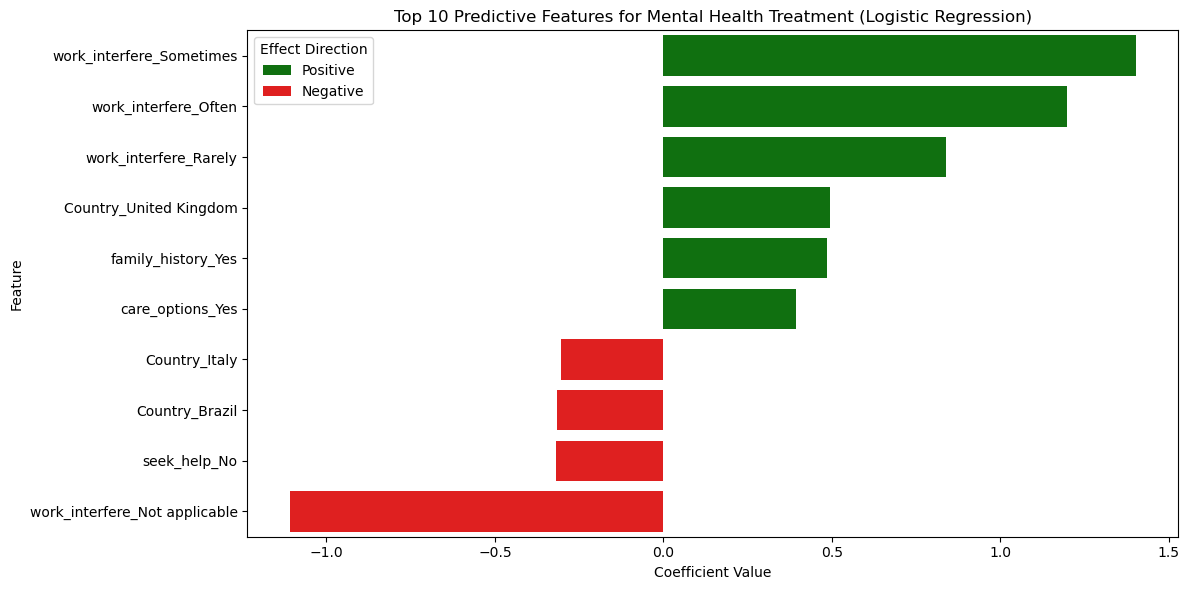

In [240]:
# Extract 
feature_names = X_encoded.columns
coefficients = pd.Series(logreg.coef_[0], index=feature_names)

# Get top 10
top_10_features = coefficients.abs().sort_values(ascending=False).head(10).index
top_coefficients = coefficients[top_10_features]

top_features_df = pd.DataFrame({
    'Feature': top_coefficients.index,
    'Coefficient': top_coefficients.values
})

# Direction column
top_features_df['Direction'] = top_features_df['Coefficient'].apply(lambda x: 'Positive' if x > 0 else 'Negative')

top_features_df = top_features_df.sort_values(by=['Direction', 'Coefficient'], ascending=[False, False])

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_features_df,
    x='Coefficient',
    y='Feature',
    hue='Direction',
    dodge=False,
    palette={'Positive': 'green', 'Negative': 'red'}
)
plt.title("Top 10 Predictive Features for Mental Health Treatment (Logistic Regression)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.legend(title='Effect Direction')
plt.tight_layout()
plt.show()

**Interpretation:**
- **Positive Predictors:**
     -  **work_interfere_Sometimes, Often, and Rarely:** an employee is more likely to seek treatment if they report that their mental health interferes with their work. This aligns with expectations and shows that workplace stress is a common trigger for seeking help.
     -  **family_history_Yes:** individuals with family history of mental illness were more likely to seek treatment. This shows that prior awareness may influence decision-making.
     -  **Country_United Kingdom:** this may reflect cultural or healthcare system differences that make treatment more accessible or socially acceptable.
     -  **care_options_Yes:** employees that are aware of mental health care options provided by their employer are more likely to seek treatment. This suggests that availability of support services in the workplace can encourage individuals to take action.

- **Negative Predictors:**
  - **work_interfere_Not applicable:** indicates that employees who claim their mental health does not affect their work are much less likely to seek treatment.
  - **seek_help_No:** employees who said their company does not provide resources to learn more about mental health issues and how to seek help are less likely to have sought treatment themselves. This may reflect stigma or lack of resources.
  - **Country_Brazil & Country_Italy:** Could reflect cultural stigma or accessibility issues.

### 5.3 Final Conclusions & Answers to Research Questions
This study explored the predictors of mental health treatment-seeking among tech workers. Below, the research questions posed at the outset of the analysis are revisited and answered.

**1. Can whether a tech worker has sought mental health treatment be predicted based on their work environment, employer support, and personal factors?**
Yes. The models, especially Logistic Regression (AUC: 0.863), showed that treatment-seeking behavior can be predicted with a high degree of accuracy. Features such as work interference, family history of mental illness, location and care options were found to be strong predictors. These findings show the important role that personal background and workplace environment play in influencing an individual’s decision to seek mental health treatment.

**2. Which workplace policies (e.g remote work, anonymity, mental health benefits) are most strongly associated with treatment-seeking behaviour?**
The strongest predictors found through the Logistic Regression model were related to workplace interference. Individuals who reported experiencing any level of interference (often, sometimes, or rarely) were significantly more likely to seek treatment. Additionally, lack of employer-provided help (e.g seek_help=No) and certain countries were negatively associated with treatment. This implies that workers in environments with minimal support or high stigma are less likely to seek help.

**3. How do the predictive capabilities of a baseline model (Logistic Regression) compare with more advanced models (Decision Tree, Neural Network) when predicting whether individuals in the tech industry seek treatment for mental health?**
The Logistic Regression model outperformed both the Decision Tree and the Neural Network in terms of AUC and accuracy. Although the Decision Tree was more interpretable and the Neural Network captured more complex patterns, neither offered meaningful improvements in performance. Given the size and nature of the dataset, Logistic Regression struck the best balance between clarity and predictive strength.

This project shows that both workplace and personal factors are effective in predicting whether someone seeks mental health treatment. It also emphasises the role of employer support, family history, and regional influences. Overall, the findings point to a need for tech companies to invest in mental health resources and pay closer attention to workplace stressors to better support their employees.